Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.



In [147]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [148]:
df = pd.read_csv('melbourne_housing.csv',parse_dates=['Date'])
print(df.size)
#df.columns

#drop irrelevant columns
df_cleaned = df.drop(['Address','Lattitude','Longtitude','SellerG','Method'],axis=1)

# drop records that aren't houses
df_cleaned = df_cleaned[df_cleaned.Type == 'h']
df_cleaned = df_cleaned.drop(['Type'],axis=1)


#print(df_cleaned.isnull().sum())

#drop records with null values
df_cleaned = df_cleaned[pd.notnull(df_cleaned['Price'])]
df_cleaned = df_cleaned[pd.notnull(df_cleaned['BuildingArea'])]
df_cleaned = df_cleaned[pd.notnull(df_cleaned['CouncilArea'])]
df_cleaned = df_cleaned[pd.notnull(df_cleaned['YearBuilt'])]


# create a season feature based on month
df_cleaned['month'] = df_cleaned['Date'].dt.month

df_simple = df_cleaned




print(df_cleaned.isnull().sum())
print(df_cleaned.size)

print(df_cleaned.head())



494487
Suburb           0
Rooms            0
Price            0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
month            0
dtype: int64
65456
        Suburb  Rooms      Price       Date  Distance  Postcode  Bedroom2  \
2   Abbotsford      2  1035000.0 2016-04-02       2.5    3067.0       2.0   
4   Abbotsford      3  1465000.0 2017-04-03       2.5    3067.0       3.0   
6   Abbotsford      4  1600000.0 2016-04-06       2.5    3067.0       3.0   
11  Abbotsford      3  1876000.0 2016-07-05       2.5    3067.0       4.0   
14  Abbotsford      2  1636000.0 2016-08-10       2.5    3067.0       2.0   

    Bathroom  Car  Landsize  BuildingArea  YearBuilt CouncilArea  \
2        1.0  0.0     156.0          79.0     1900.0       Yarra   
4        2.0  0.0     134.0         150.0     1900.0       Yarra   
6  

In [149]:
# create a category for each season
# df_cleaned['spring_sale'] =  np.where(np.logical_and(df_cleaned['month'] < 12, df_cleaned['month'] > 8), 1, 0)
# df_cleaned['winter_sale'] =  np.where(np.logical_and(df_cleaned['month'] < 9, df_cleaned['month'] > 5), 1, 0)
# df_cleaned['summer_sale'] =  np.where(np.logical_or(df_cleaned['month'] < 3,df_cleaned['month'] == 12 ), 1, 0)
# df_cleaned['autumn_sale'] =  np.where(np.logical_and(df_cleaned['month'] < 6, df_cleaned['month'] > 2), 1, 0)

df_cleaned = df_cleaned.drop(['CouncilArea','Suburb','Date','Propertycount','month'],axis=1)

# create dummies from categorical values
df_cleaned = pd.get_dummies(df_cleaned)
df_cleaned = df_cleaned.drop(['Regionname_Eastern Metropolitan','Regionname_Eastern Victoria','Regionname_Northern Victoria',\
    'Regionname_South-Eastern Metropolitan','Regionname_Western Victoria'],axis=1)
print(df_cleaned.corr())

                                     Rooms     Price  Distance  Postcode  \
Rooms                             1.000000  0.378877  0.178377  0.098214   
Price                             0.378877  1.000000 -0.320987  0.135201   
Distance                          0.178377 -0.320987  1.000000  0.456552   
Postcode                          0.098214  0.135201  0.456552  1.000000   
Bedroom2                          0.922060  0.352559  0.189853  0.101002   
Bathroom                          0.595391  0.452985  0.072482  0.147410   
Car                               0.329662  0.144163  0.237158  0.048362   
Landsize                          0.360023  0.195659  0.329866  0.102217   
BuildingArea                      0.519463  0.434166  0.063374  0.102812   
YearBuilt                         0.168248 -0.208936  0.427012  0.066033   
Regionname_Northern Metropolitan -0.187254 -0.230884 -0.201746 -0.187670   
Regionname_Southern Metropolitan  0.117848  0.533279 -0.153589  0.380479   
Regionname_W

In [157]:
rfr = ensemble.RandomForestRegressor()

Y = df_cleaned['Price']
X = df_cleaned.drop('Price', 1)
print(X.head())

rfr.fit(X,Y)
rfr.score(X,Y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


    Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
2       2       2.5    3067.0       2.0       1.0  0.0     156.0   
4       3       2.5    3067.0       3.0       2.0  0.0     134.0   
6       4       2.5    3067.0       3.0       1.0  2.0     120.0   
11      3       2.5    3067.0       4.0       2.0  0.0     245.0   
14      2       2.5    3067.0       2.0       1.0  2.0     256.0   

    BuildingArea  YearBuilt  Regionname_Northern Metropolitan  \
2           79.0     1900.0                                 1   
4          150.0     1900.0                                 1   
6          142.0     2014.0                                 1   
11         210.0     1910.0                                 1   
14         107.0     1890.0                                 1   

    Regionname_Southern Metropolitan  Regionname_Western Metropolitan  
2                                  0                                0  
4                                  0                    

Feature ranking:
1. feature Rooms (0.291969)
2. feature Distance (0.279641)
3. feature Postcode (0.165329)
4. feature Bedroom2 (0.096964)
5. feature Bathroom (0.059000)
6. feature Car (0.052695)
7. feature Landsize (0.016180)
8. feature BuildingArea (0.015600)
9. feature YearBuilt (0.013405)
10. feature Regionname_Northern Metropolitan (0.007907)
11. feature Regionname_Southern Metropolitan (0.000805)
12. feature Regionname_Western Metropolitan (0.000504)


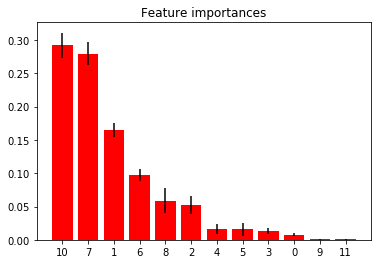

In [158]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Results

I ran a Random Forest Regression as a model for housing prices in Melbourne. 
The most important features for predicting price were Rooms, Distance, Bedrooms, Bathrooms and Postcode for predicting price. Number of rooms, bedrooms, bathrooms were correlated to price and distance from central business district were negatively correlated with the price.